# 🌿 Hierarchical Clustering on the Iris Dataset

## 📌 Description

This notebook demonstrates how to perform **Hierarchical Clustering** on the classic **Iris dataset**, using various linkage strategies and full data visualization. Hierarchical clustering is an unsupervised learning algorithm that builds a nested hierarchy of clusters, typically represented by a dendrogram.

---

## 📖 What You’ll Learn

- How to **load and explore** the Iris dataset
- How to **standardize features** for fair distance measurement
- How to apply **agglomerative hierarchical clustering** using:
  - Ward’s Method
  - Single Linkage
  - Complete Linkage
  - Average Linkage
- How to generate and interpret a **dendrogram**
- How to **extract flat clusters** from the hierarchy
- How to **visualize clustering results** in pairplots
- How to **evaluate clustering quality** using Adjusted Rand Index (optional, since ground truth exists)

---

In [1]:
# 📚 Hierarchical Clustering on the Iris Dataset

from scipy.stats import mode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import adjusted_rand_score

def match_clusters_to_labels(true_labels, cluster_labels):
    labels = np.zeros_like(cluster_labels)
    for cluster in np.unique(cluster_labels):
        mask = cluster_labels == cluster
        most_common = mode(true_labels[mask], keepdims=True)[0][0]
        labels[mask] = most_common
    return labels

In [2]:
# Step 1: Load and Explore the Data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print("🔍 Shape of dataset:", X.shape)
X.head()

🔍 Shape of dataset: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


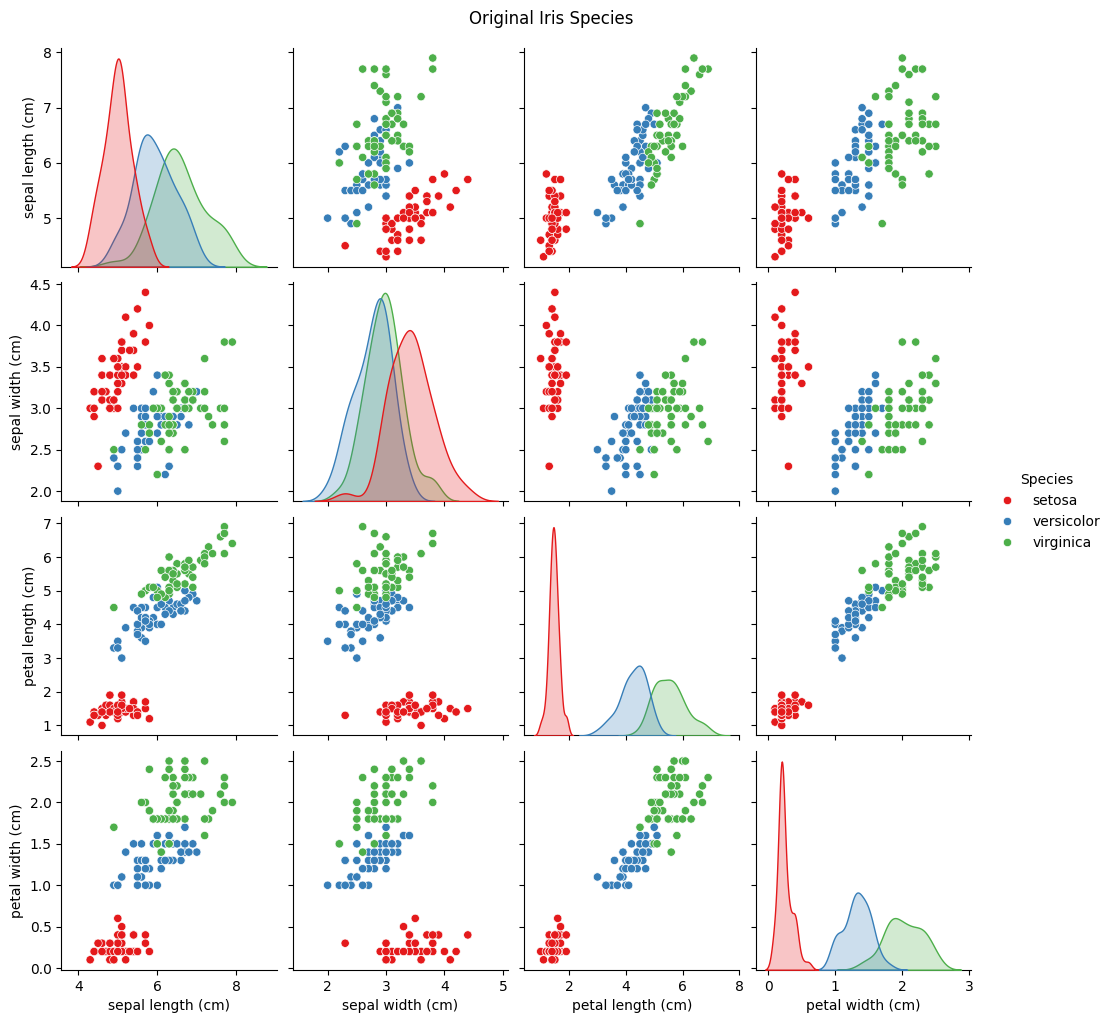

In [3]:
# Step 2: Visualize the Original Data
sns.pairplot(X.assign(Species=iris.target_names[y]), hue="Species", palette="Set1")
plt.suptitle("Original Iris Species", y=1.02)
plt.show()

In [4]:
# Step 3: 🔧 Standardizing ensures fair distance computation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

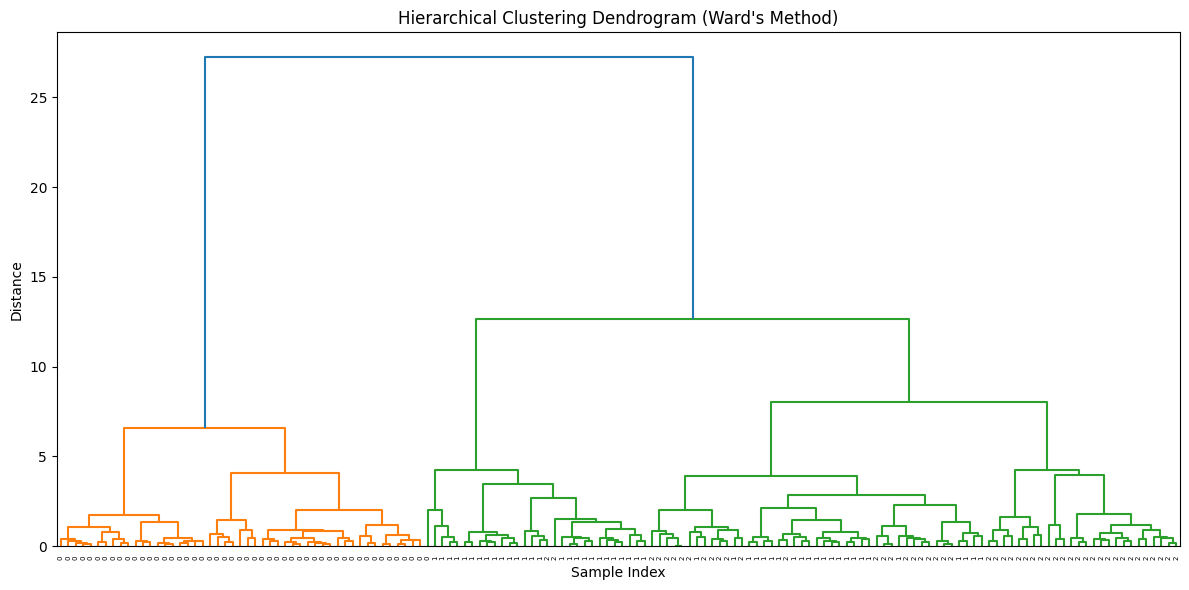

In [5]:
# Step 4: Compute Linkage Matrix
Z = linkage(X_scaled, method='ward')  # Try also 'single', 'complete', 'average'

# Step 5: Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=iris.target, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Ward's Method)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [6]:
# Step 6: Extract Flat Clusters
# Let's cut the dendrogram at 3 clusters (we know Iris has 3 species)
clusters = fcluster(Z, t=3, criterion='maxclust')
clusters = match_clusters_to_labels(y, clusters)
# Step 7: Add cluster labels to dataframe
X_clustered = X.copy()
X_clustered['Cluster'] = clusters
X_clustered['True_Label'] = y
X_clustered.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,True_Label
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


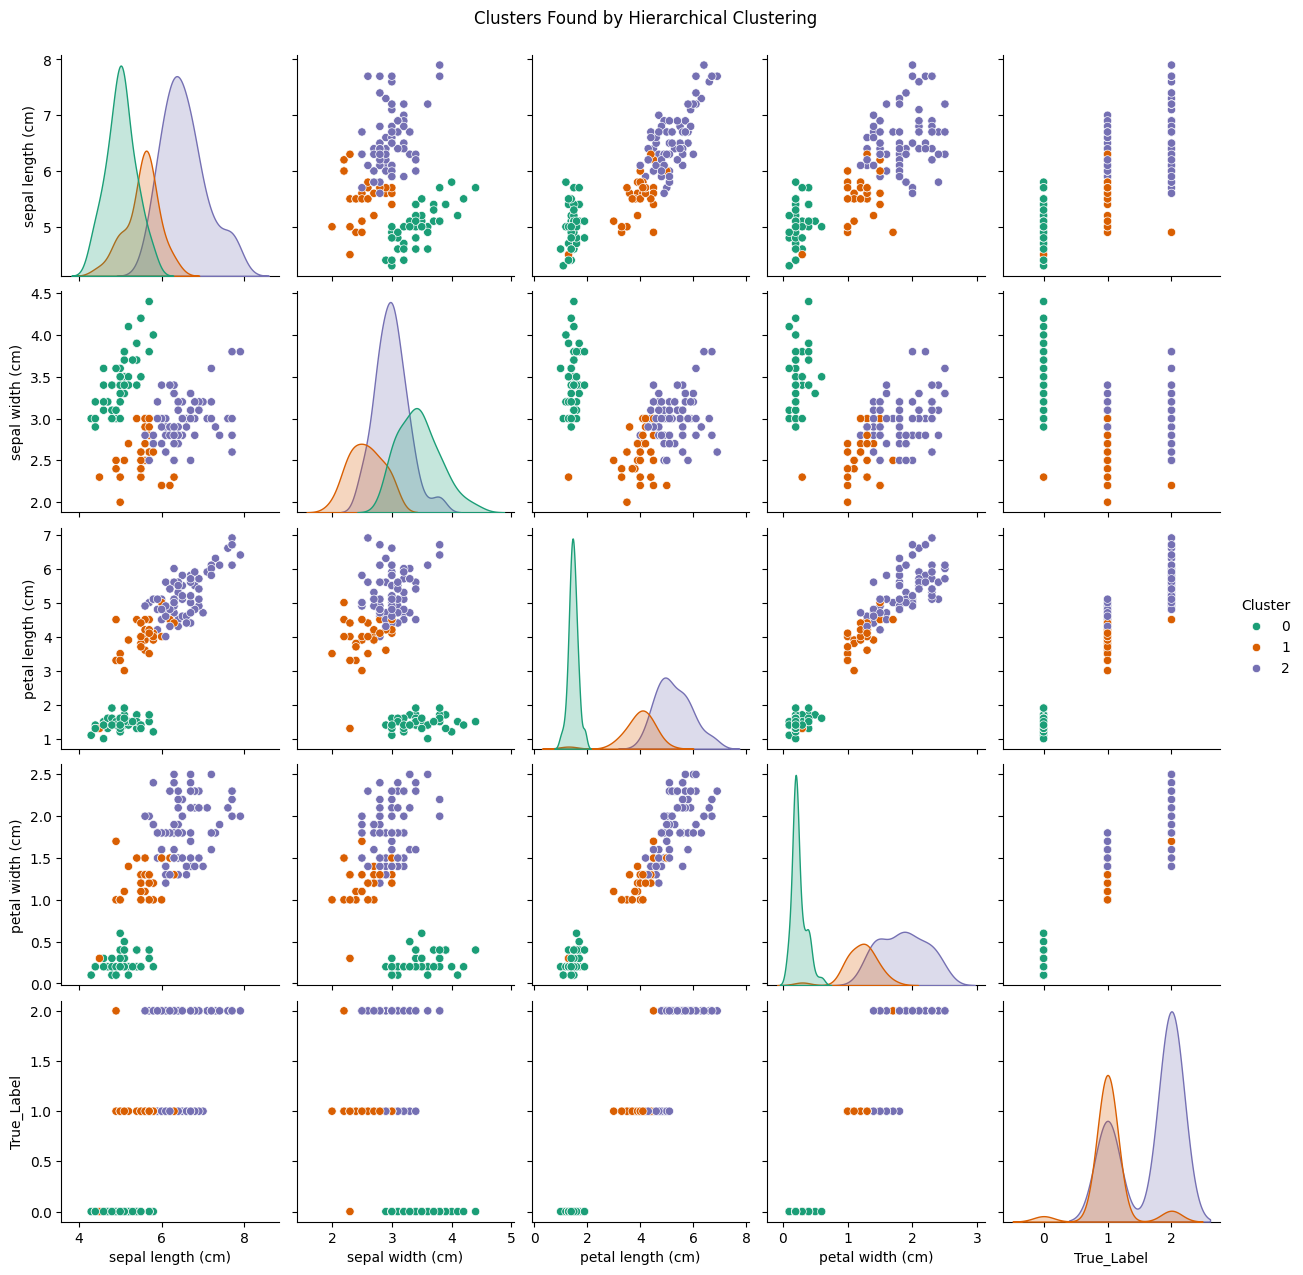

In [7]:
# Step 8: Visualize Cluster Assignments
sns.pairplot(X_clustered, hue="Cluster", palette="Dark2")
plt.suptitle("Clusters Found by Hierarchical Clustering", y=1.02)
plt.show()


In [8]:
for method in ['single', 'complete', 'average']:
    Z_method = linkage(X_scaled, method=method)
    clusters_method = fcluster(Z_method, 3, criterion='maxclust')

    # Reasignar los labels para que coincidan con las clases verdaderas
    matched = match_clusters_to_labels(y, clusters_method)
    ari = adjusted_rand_score(y, matched)

    print(f"🔗 Method: {method.ljust(8)} | ARI: {ari:.3f}")

🔗 Method: single   | ARI: 0.568
🔗 Method: complete | ARI: 0.573
🔗 Method: average  | ARI: 0.562
